In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt
from time import time
from pylab import plot, show, legend
from PF import *
from Lorenz63 import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [16]:
dt = 1e-3
delta = 10*dt
T = 500

sigma, rho, beta, noise_intensity, obs_noise = 10.0, 28.0, 8/3, 1e-1, 1e0
theta = [sigma, rho, beta, noise_intensity, dt, delta, obs_noise]
x_0 = np.ones(3)

y, X = simulate_data_Lorenz63(theta, x_0, T)
data = dict(x_0=x_0, y=y)

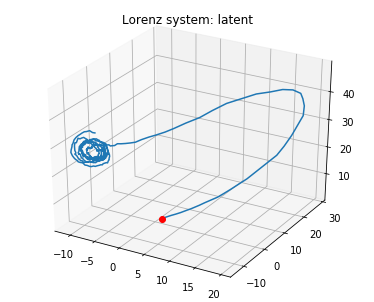

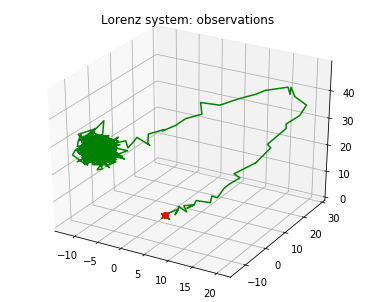

In [17]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:,0], X[:,1], X[:,2])
ax.plot(X[0:1,0], X[0:1,1], X[0:1,2], 'ro')
plt.title("Lorenz system: latent")

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(y[:,0], y[:,1], y[:,2], color='green')
ax.plot(y[0:1,0], y[0:1,1], y[0:1,2], 'ro')
plt.title("Lorenz system: observations");

In [18]:
def test_fn(x) : return np.mean(x,1)

In [19]:
N = 1_000
potential, propagate = potential_Lorenz63, propagate_Lorenz63
_, _, particles_bpf = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=True)

100%|██████████| 500/500 [00:00<00:00, 586.43it/s]


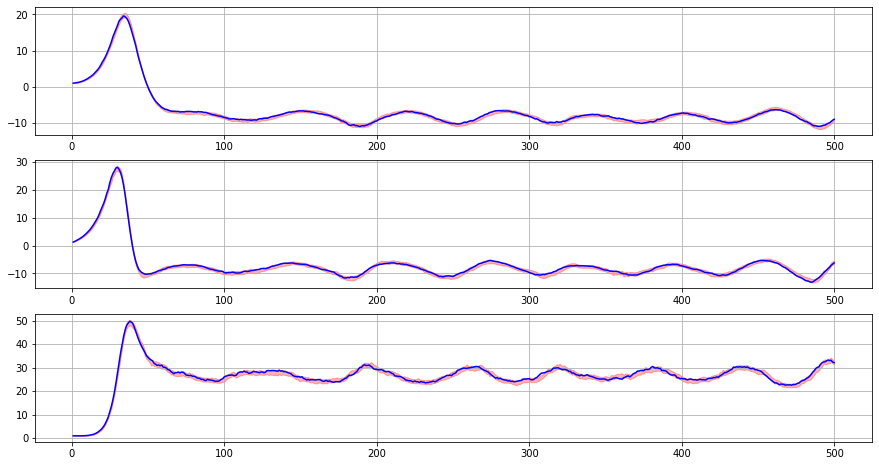

In [20]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(3) :
    plt.subplot(3,1,i+1)
    CI = np.percentile(particles_bpf[:,:T,i],q=[2.5,97.5],axis=0)
    plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
    plt.grid(True)
    plt.plot(np.arange(1,T+1), X[1:,i], "blue");

### AIRPF:

In [21]:
S = 4
A = npr.rand(S,N,N)
for s in range(S) :
    for i in range(N) :
        A[s,i] = A[s,i]/np.sum(A[s,i])

100%|██████████| 500/500 [01:46<00:00,  4.72it/s]


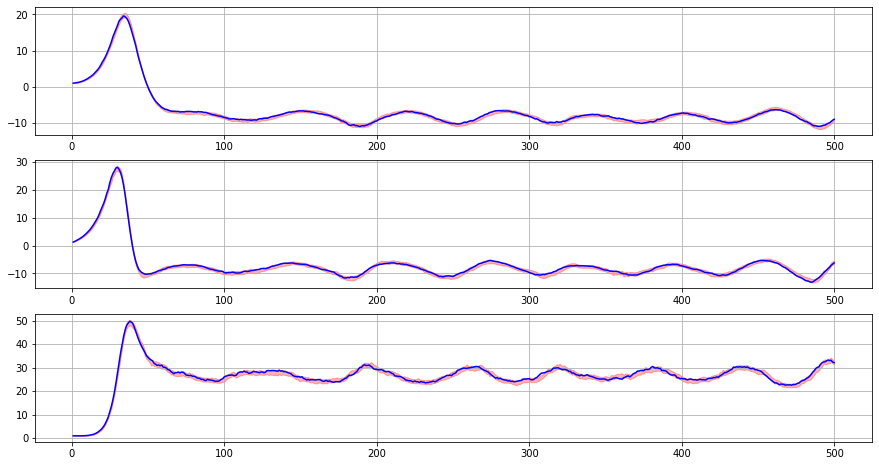

In [22]:
test_fn_est, particles_airpf = AIRPF(data, theta, potential, propagate, test_fn, A, store_paths=True)
plt.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(3) :
    plt.subplot(3,1,i+1)
    CI = np.percentile(particles_bpf[:,:T,i],q=[2.5,97.5],axis=0)
    plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
    plt.grid(True)
    plt.plot(np.arange(1,T+1), X[1:,i], "blue");